In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906


In [ ]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [ ]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128,134,138,144,148,150,154,157,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,978,988,996,1004,1011,1018,1028,1040,1052,1057,1068,1078,1087,1100,1111,1124,1136,1146,1155,1163,1174,1186,1200,1210,1223,1231,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333,1341,1351,1360,1370
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,22,23,23,26,26,26,27,28,29,29,29,29,30,33,33,35,39,40,41,47,48,51,52,54,55,58,59,62,64,67,70,75,78,80,80,80,86,86,88


In [ ]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12329,12637,13124,13124,13743,14019,14295,14792,15107,15430,15744,16051,16400,16646,16983,17369,17369,18076,18088,18837,19233,19592,20082,20537,20988,21419,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627,26004,26308,26644,27017
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,802,802,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,804,806,807,807,807,821,825,825,828,839,839,839,839,839,855,858,863,863,863
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,117,117,117,118,118,118,118,124,124,199,210,221,221,221,221,236,241,242,242,242,266,301,395,437,460,461,476,503,506,520,544,564,567,569,575,577,577,584,628,628


In [ ]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-25-2020.csv')

In [ ]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-26 02:30:51,34.223334,-82.461707,24,0,0,24,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-26 02:30:51,30.295065,-92.414197,130,7,0,123,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-26 02:30:51,37.767072,-75.632346,146,3,0,143,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-26 02:30:51,43.452658,-116.241552,650,15,0,635,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-26 02:30:51,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [ ]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/7/20', '8/8/20', '8/9/20', '8/10/20', '8/11/20', '8/12/20',
       '8/13/20', '8/14/20', '8/15/20', '8/16/20'],
      dtype='object', length=212)

In [ ]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [ ]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5029,5220,5551,5931,6230,6566,6764,7064,7412,7764,8204,8549,8916,9228,9398,9744,10093,10306,10469,10621,10938,11284,11548,11837,12160,12297,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184,15491,15834,16153,16534
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1318,1356,1380,1389,1465,1498,1516,1526,1552,1576,1581,1606,1619,1629,1640,1654,1674,1674,1681,1691,1703,1711,1726,1728,1730,1734,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841,1847,1858,1858,1869
264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1895,1895,1895,1895,1895,1895,1895,1895,1895,2810,2980,2980,3326,3386,3583,3789,3856,4328,4481,4552,5002,5249,5555,5963,6228,6347,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501,8663,9021,9186,9343


In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []


china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [ ]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())


In [ ]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78981,
 79545,
 80398,
 81375,
 82739,
 84116,
 86011,
 88395,
 90369,
 92947,
 95246,
 98037,
 101980,
 106018,
 109972,
 113872,
 118896,
 126559,
 132309,
 146716,
 157824,
 168973,
 183640,
 199487,
 219083,
 247002,
 276612,
 308921,
 342341,
 384508,
 425675,
 476494,
 539391,
 603791,
 671447,
 731024,
 795666,
 872076,
 948290,
 1029704,
 1112859,
 1193322,
 1265035,
 1337712,
 1414580,
 1498360,
 1585025,
 1672620,
 1749575,
 1846390,
 1916063,
 1985901,
 2066740,
 2163426,
 2251145,
 2325103,
 2405607,
 2478960,
 2554241,
 2631027,
 2720027,
 2806972,
 2891910,
 2964853,
 3033572,
 3108878,
 3185925,
 3269608,
 3356663,
 3438339,
 3515957,
 3592058,
 3672050,
 3762073,
 3851158,
 3942676,
 4028522,
 4104768,
 4181009,
 4264584,
 4349360

In [ ]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4266,
 4611,
 4916,
 5413,
 5830,
 6471,
 7151,
 7956,
 8855,
 9962,
 11442,
 13149,
 14850,
 16772,
 19047,
 21828,
 24843,
 28370,
 32069,
 35549,
 39727,
 44602,
 50183,
 56515,
 62522,
 68406,
 73490,
 79393,
 87364,
 94166,
 101872,
 109196,
 115343,
 121153,
 126978,
 133930,
 142302,
 149645,
 158589,
 165120,
 169737,
 175216,
 182420,
 189220,
 196101,
 202812,
 208436,
 212356,
 217047,
 223533,
 230316,
 236306,
 241505,
 246966,
 250444,
 254592,
 260478,
 267052,
 272477,
 278066,
 282340,
 285921,
 289396,
 294953,
 300194,
 305471,
 310706,
 314870,
 318205,
 321502,
 326290,
 331186,
 335983,
 341271,
 345269,
 348415,
 349603,
 353816,
 359038,
 363749,
 368496,


In [ ]:
confirmed_sum

21672186

In [ ]:
death_sum

775244

In [ ]:
recovered_sum

13676868

In [ ]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 24,
 30,
 53,
 73,
 104,
 174,
 222,
 337,
 451,
 519,
 711,
 1109,
 1561,
 2157,
 2870,
 2968,
 4360,
 6141,
 8917,
 14157,
 19479,
 25825,
 33761,
 43850,
 54112,
 66055,
 84091,
 102276,
 122069,
 141205,
 162707,
 188724,
 214205,
 244610,
 276547,
 309699,
 337573,
 367215,
 397992,
 429686,
 464442,
 497943,
 527969,
 556522,
 581813,
 608878,
 637974,
 669272,
 701996,
 730337,
 756375,
 783716,
 809318,
 837422,
 871617,
 907908,
 940829,
 968518,
 990983,
 1015518,
 1043038,
 1072667,
 1106829,
 1136024,
 1161611,
 1184086,
 1208271,
 1233527,
 1261409,
 1288587,
 1314320,
 1334084,
 1352962,
 1375152,
 1396110,
 1423727,
 1449027,
 1474128,
 1493132,
 1514901,
 1535350,
 1559157,
 1584512,
 1608653,
 1630476,
 1651289,
 1670280,
 1689163,
 1707445,
 1730260,
 1754764,
 1779214,
 1799124,
 1816479,
 1

In [ ]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [ ]:
italy_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 45,
 46,
 46,
 83,
 149,
 160,
 276,
 414,
 523,
 589,
 622,
 724,
 724,
 1045,
 1045,
 1439,
 1966,
 2335,
 2749,
 2941,
 4025,
 4440,
 4440,
 6072,
 7024,
 7024,
 8326,
 9362,
 10361,
 10950,
 12384,
 13030,
 14620,
 15729,
 16847,
 18278,
 19758,
 20996,
 21815,
 22837,
 24392,
 26491,
 28470,
 30455,
 32534,
 34211,
 35435,
 37130,
 38092,
 40164,
 42727,
 44927,
 47055,
 48877,
 51600,
 54543,
 57576,
 60498,
 63120,
 64928,
 66624,
 68941,
 71252,
 75945,
 78249,
 79914,
 81654,
 82879,
 85231,
 93245,
 96276,
 99023,
 103031,
 105186,
 106587,
 109039,
 112541,
 115288,
 120205,
 122810,
 125176,
 127326,
 129401,
 132282,
 134560,
 136720,
 138840,
 140479,
 141981,
 144658,
 147101,
 150604,
 152844,
 155633,
 157507,
 158355,
 160092,
 160938,
 161895,
 163781,
 165078,
 165837,
 166584,
 168646,
 169939,
 171338,
 173085,
 174865,
 

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [ ]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [ ]:
spain_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 7,
 2,
 17,
 13,
 39,
 36,
 45,
 57,
 37,
 141,
 100,
 173,
 400,
 622,
 582,
 0,
 2955,
 1159,
 1407,
 2144,
 1806,
 2162,
 4053,
 2447,
 4964,
 3394,
 6368,
 4749,
 9630,
 8271,
 7933,
 7516,
 6875,
 7846,
 7967,
 8195,
 7947,
 7134,
 6969,
 5478,
 5029,
 5267,
 6278,
 5002,
 5051,
 4754,
 3804,
 3268,
 2442,
 5103,
 7304,
 5891,
 887,
 6948,
 1536,
 3968,
 4211,
 4635,
 -10034,
 2915,
 1729,
 1831,
 1308,
 2144,
 518,
 1781,
 1366,
 884,
 545,
 1318,
 996,
 1122,
 1410,
 721,
 772,
 3086,
 594,
 661,
 849,
 643,
 515,
 0,
 908,
 431,
 518,
 482,
 1787,
 466,
 482,
 -372,
 859,
 0,
 1647,
 658,
 664,
 251,
 159,
 294,
 394,
 334,
 318,
 332,
 240,
 167,
 249,
 314,
 427,
 502,
 396,
 323,
 181,
 219,
 355,
 585,
 307,
 363,
 334,
 232,
 248,
 334,
 400,
 419,
 564,
 301,
 200,
 301,
 388,
 444,
 442,
 0,
 0,
 1244,
 341,
 383,
 543,
 852,
 0,
 0

In [ ]:
germany_daily_increase

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 19,
 2,
 31,
 51,
 29,
 37,
 66,
 220,
 188,
 129,
 241,
 136,
 281,
 451,
 170,
 1597,
 910,
 1210,
 1477,
 1985,
 3070,
 2993,
 4528,
 2365,
 2660,
 4183,
 3930,
 4337,
 6615,
 6933,
 6824,
 4400,
 4790,
 4923,
 6064,
 6922,
 6365,
 4933,
 4031,
 3251,
 4289,
 5633,
 4885,
 3990,
 2737,
 2946,
 2218,
 1287,
 3394,
 2945,
 3699,
 1945,
 1842,
 1881,
 1226,
 2357,
 2481,
 1870,
 1514,
 1257,
 988,
 1154,
 1627,
 1470,
 1068,
 890,
 697,
 488,
 855,
 1155,
 1268,
 1158,
 736,
 555,
 697,
 595,
 927,
 380,
 755,
 519,
 617,
 182,
 1227,
 695,
 548,
 689,
 276,
 342,
 272,
 600,
 324,
 672,
 726,
 267,
 221,
 184,
 285,
 242,
 351,
 452,
 526,
 300,
 359,
 397,
 16,
 169,
 535,
 41,
 251,
 164,
 570,
 352,
 1213,
 482,
 371,
 602,
 496,
 712,
 391,
 500,
 665,
 422,
 235,
 349,
 376,
 475,
 477,
 410,
 418,
 325,
 541,
 279,
 356,
 302,
 331,
 3

In [ ]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [ ]:
china_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 102,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 252,
 152,
 142,
 103,
 98,
 139,
 113,
 122,
 0,
 205,
 2,
 150,
 70,
 52,
 29,
 44,
 47,
 35,
 42,
 33,
 36,
 32,
 29,
 28,
 28,
 23,
 16,
 22,
 11,
 8,
 13,
 10,
 14,
 13,
 11,
 8,
 4,
 6,
 15,
 0,
 7,
 4,
 6,
 5,
 3,
 5,
 4,
 1,
 7,
 6,
 4,
 4,
 3,
 2,
 0,
 2,
 2,
 1,
 3,
 0,
 2,
 0,
 1,
 0,
 1290,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 4,
 1,
 1,
 1,
 2,
 6,
 2,
 3,
 4,
 1,
 3,
 1,
 0,
 5,
 3,
 4,
 4,
 3,
 1,
 2,
 0]

In [ ]:
uk_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 4,
 0,
 2,
 1,
 18,
 15,
 23,
 16,
 34,
 43,
 36,
 56,
 35,
 74,
 149,
 187,
 184,
 284,
 294,
 215,
 374,
 383,
 671,
 652,
 715,
 761,
 646,
 571,
 1038,
 1036,
 1111,
 1153,
 841,
 686,
 745,
 1051,
 846,
 1033,
 937,
 1118,
 499,
 565,
 1173,
 847,
 729,
 1014,
 844,
 420,
 341,
 913,
 797,
 676,
 742,
 622,
 315,
 289,
 693,
 652,
 540,
 628,
 345,
 269,
 212,
 631,
 497,
 429,
 385,
 480,
 170,
 160,
 549,
 370,
 338,
 358,
 283,
 441,
 122,
 136,
 443,
 416,
 373,
 230,
 115,
 111,
 327,
 365,
 177,
 358,
 207,
 77,
 55,
 291,
 250,
 152,
 204,
 183,
 36,
 38,
 236,
 184,
 137,
 173,
 130,
 43,
 14,
 171,
 154,
 149,
 184,
 100,
 36,
 25,
 156,
 176,
 89,
 136,
 67,
 22,
 16,
 155,
 126,
 85,
 48,
 148,
 21,
 11,
 138,
 85,
 66,
 114,
 40,
 27,
 12,
 110,
 79,
 53,
 123,
 61,
 14,
 7,
 119

In [ ]:
# recoveries
#omar EL QARCHAOUI
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [ ]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [ ]:
world_daily_recovery

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1322,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4267,
 6215,
 466,
 9641,
 5783,
 8370,
 8776,
 8503,
 9467,
 15446,
 13493,
 15092,
 17045,
 15448,
 20417,
 13840,
 16580,
 23391,
 28716,
 25341,
 21823,
 26249,
 19408,
 27166,
 25093,
 36667,
 30828,
 26120,
 23923,
 31655,
 22002,
 34827,
 30430,
 28791,
 50033,
 27779,
 28603,
 27803,
 33267,
 42168,
 64971,
 38231,
 40917,
 32323,
 34064,
 36605,
 45919,
 39497,
 36522,
 53549,
 33594,
 46994,
 37035,
 55842,
 39735,
 47989,
 56591,
 40886,
 52898,
 52165,
 58913,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77327,
 70472,
 76308,
 54895,
 104123,
 79142,
 70029,
 69156,
 72202,
 55093,
 1

In [ ]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Canada',
 'United Kingdom',
 'China',
 'Netherlands',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bis

In [ ]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [ ]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,938154,53755,100372,784027,0.057299
1,Spain,223759,22902,95708,105149,0.102351
2,Italy,195351,26384,63120,105847,0.135059
3,France,161644,22648,45372,93624,0.140110
4,Germany,156513,5877,109800,40836,0.037550
5,United Kingdom,149569,20381,774,128414,0.136265
6,Turkey,107773,2706,25582,79485,0.025108
7,Iran,89328,5650,68193,15485,0.063250
8,China,83909,4636,78175,1098,0.055250
9,Russia,74588,681,6250,67657,0.009130


In [ ]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [ ]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [ ]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,New York,US,282143,22009,0,0.078007
1,New Jersey,US,105498,5914,0,0.056058
2,Hubei,China,68128,4512,63604,0.066228
3,Massachusetts,US,53348,2730,0,0.051173
4,California,US,42368,1689,0,0.039865
5,Illinois,US,41777,1875,0,0.044881
6,Pennsylvania,US,41153,1793,0,0.043569
7,Michigan,US,37074,3155,0,0.085100
8,Florida,US,30839,1055,0,0.034210
9,Louisiana,US,26512,1707,0,0.064386


In [ ]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

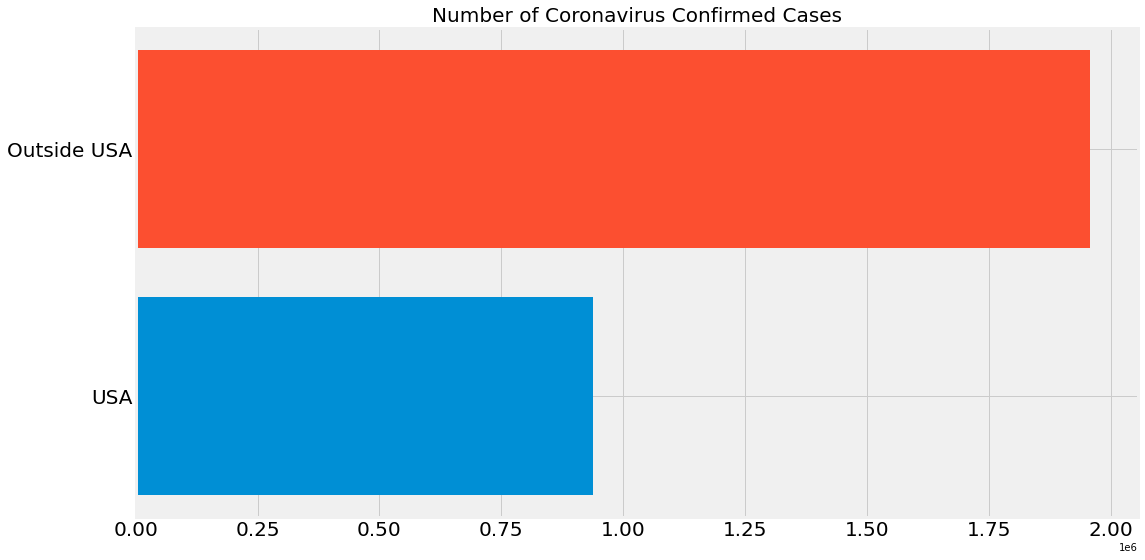

In [ ]:
USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed
plt.figure(figsize=(16, 9))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print('Outside USA {} cases:'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA 1958592 cases:
USA: 938154 cases
Total: 2896746 cases


In [ ]:
# N'afficher que 10 pays avec les cas les plus confirmés, les autres sont regroupés dans l'autre catégorie
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [ ]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

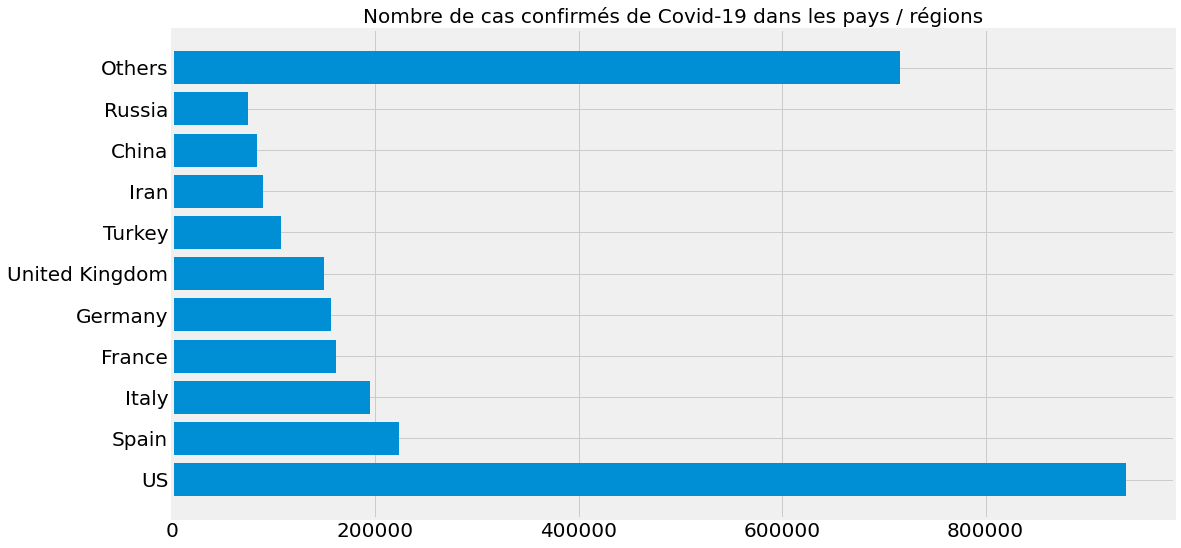

In [ ]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Nombre de cas confirmés de Covid-19 dans les pays / régions')

In [ ]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

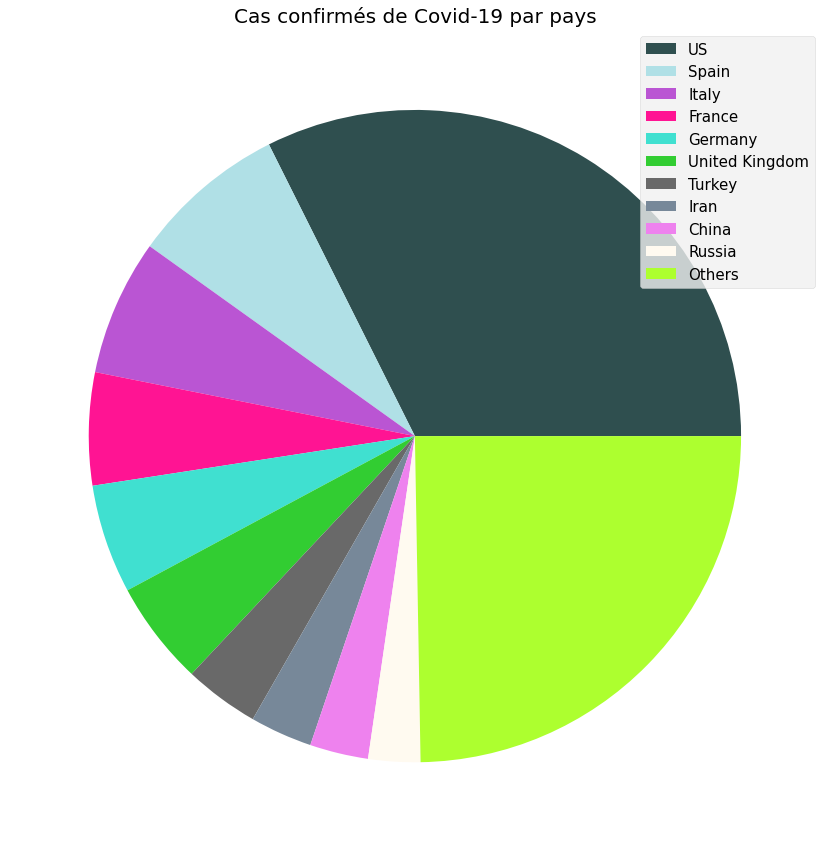

In [ ]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Cas confirmés de Covid-19 par pays')

In [ ]:
# N'afficher que 10 provinces avec les cas les plus confirmés, les autres sont regroupées dans la catégorie des autres
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('autres')
visual_confirmed_cases2.append(others)

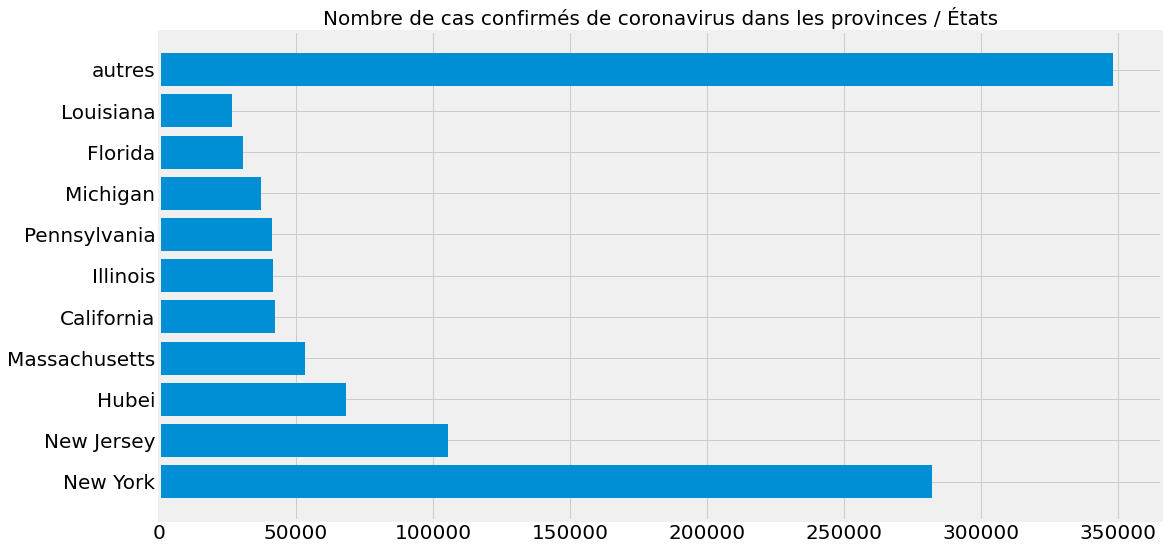

In [ ]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Nombre de cas confirmés de coronavirus dans les provinces / États')

In [ ]:
#Omar EL Qarchaoui
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

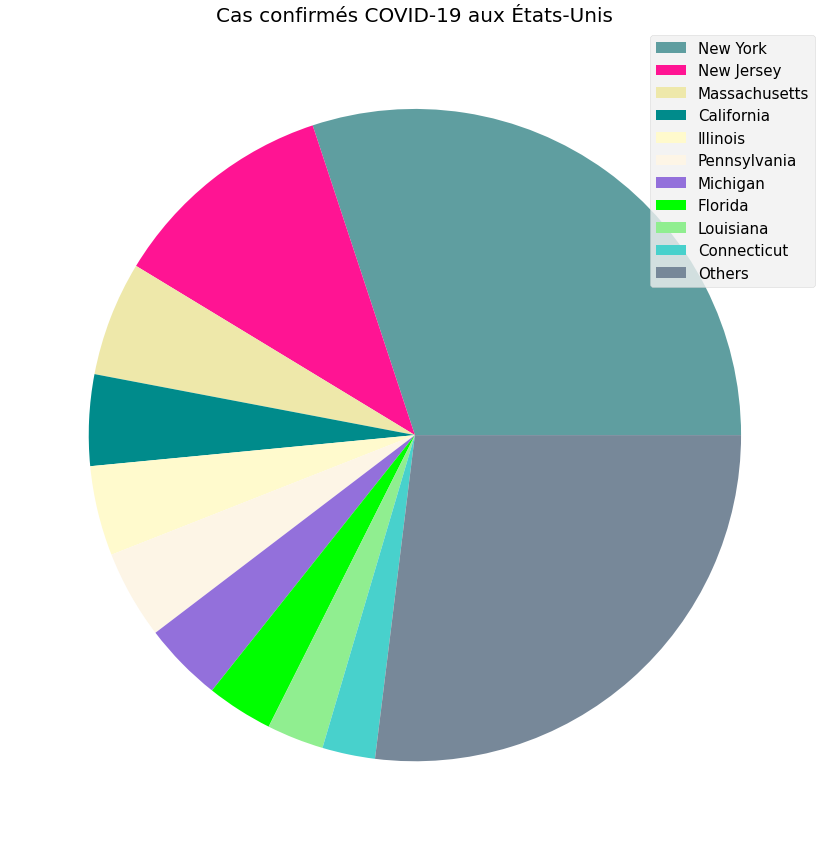

In [ ]:
plot_pie_country_with_regions('US', 'Cas confirmés COVID-19 aux États-Unis')

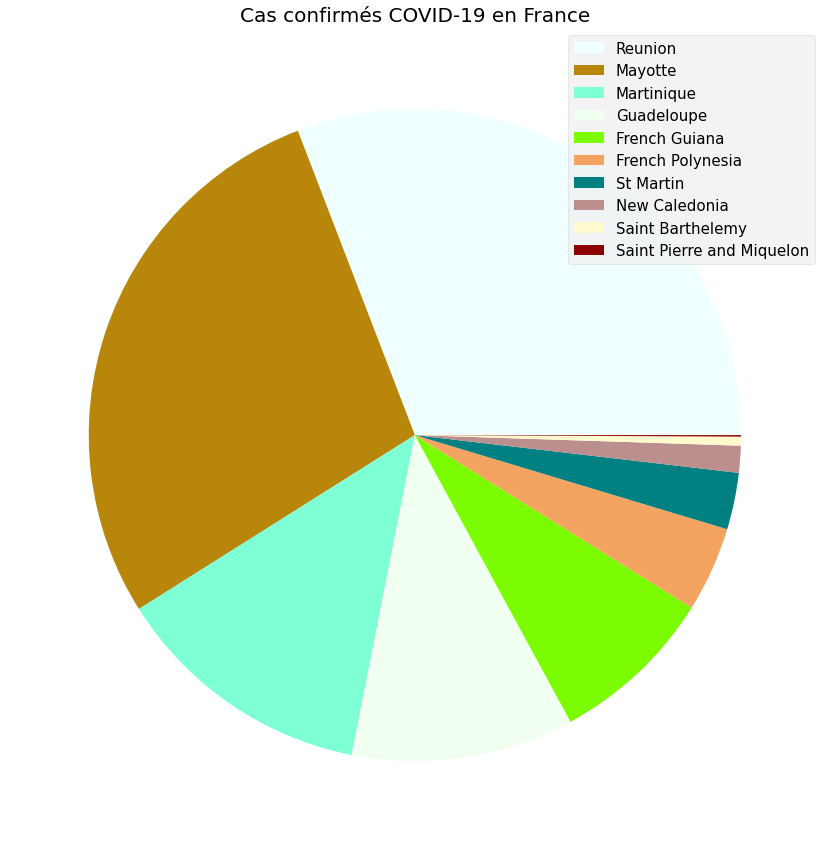

In [ ]:
plot_pie_country_with_regions('France', 'Cas confirmés COVID-19 en France')

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [ ]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [ ]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False) 

In [ ]:
# transformer nos données pour la régression polynomiale
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 1839436.778514396
MSE: 4724104870524.668


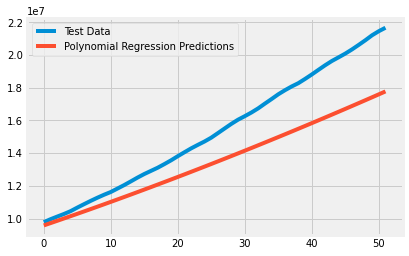

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 13233772.793738093
MSE: 235854718339495.06


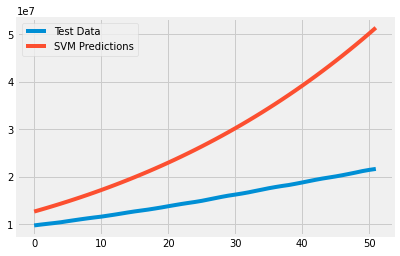

In [ ]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

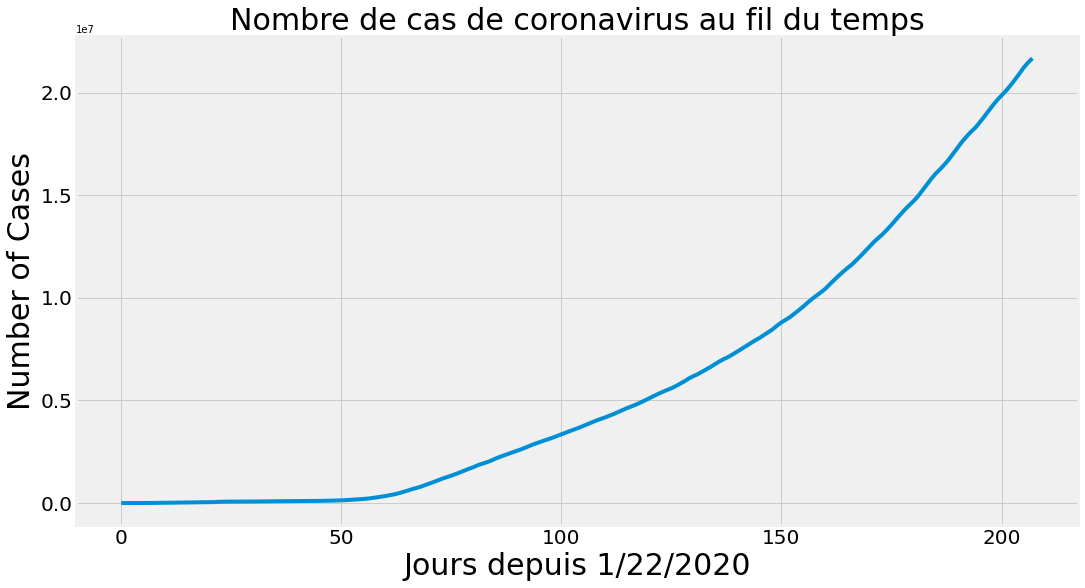

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Nombre de cas de coronavirus au fil du temps', size=30)
plt.xlabel('Jours depuis 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

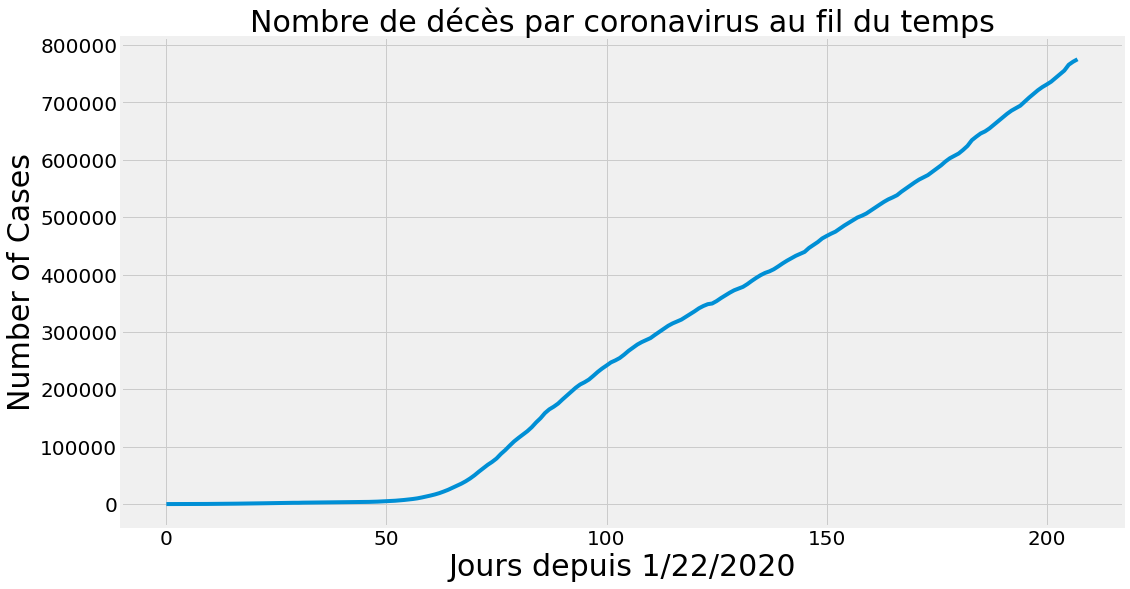

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Nombre de décès par coronavirus au fil du temps', size=30)
plt.xlabel('Jours depuis 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

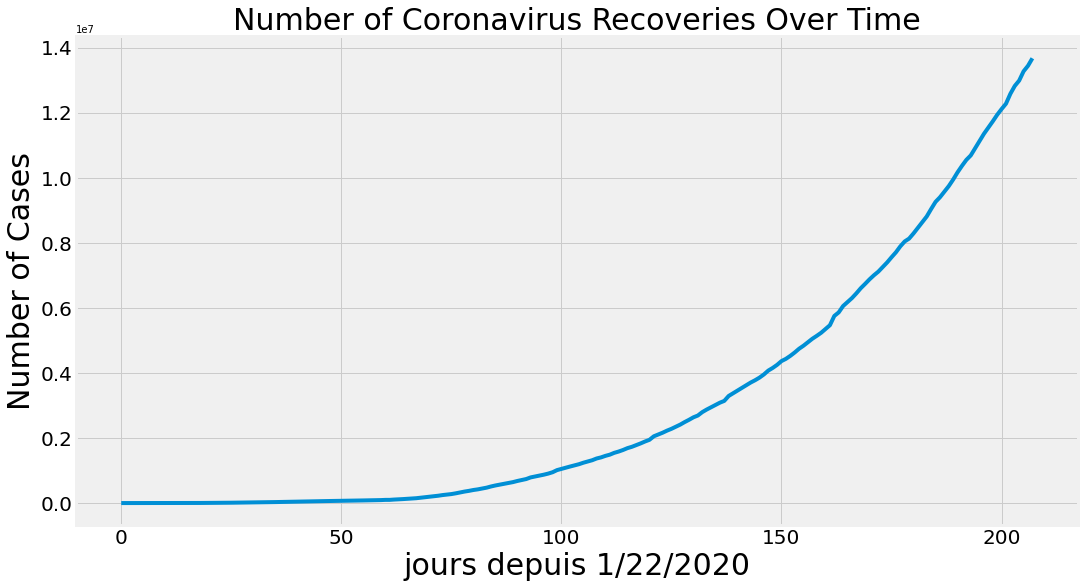

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('jours depuis 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

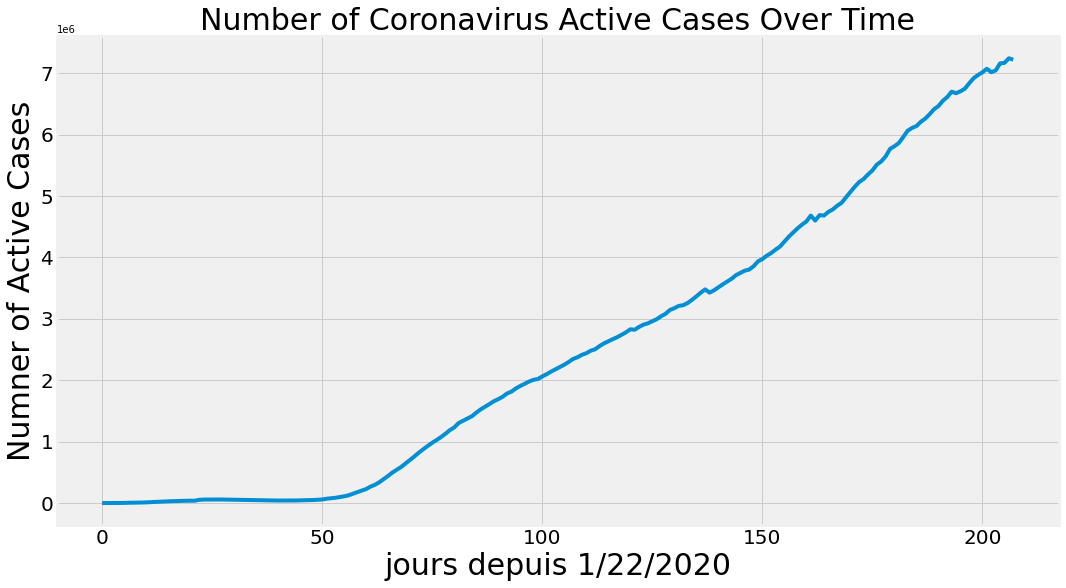

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('jours depuis 1/22/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

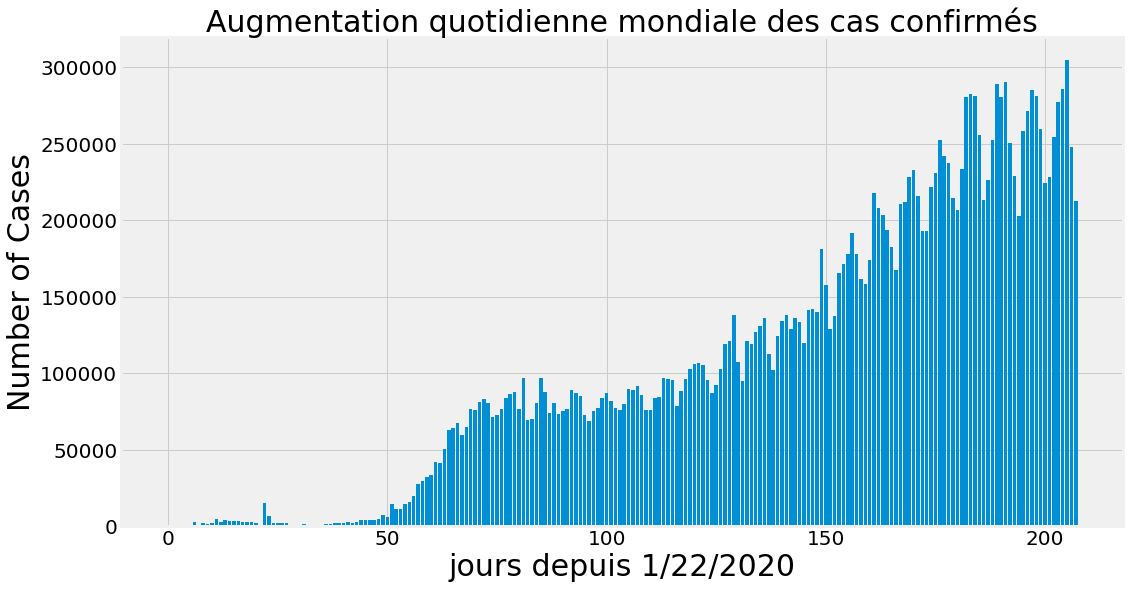

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('Augmentation quotidienne mondiale des cas confirmés', size=30)
plt.xlabel('jours depuis 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

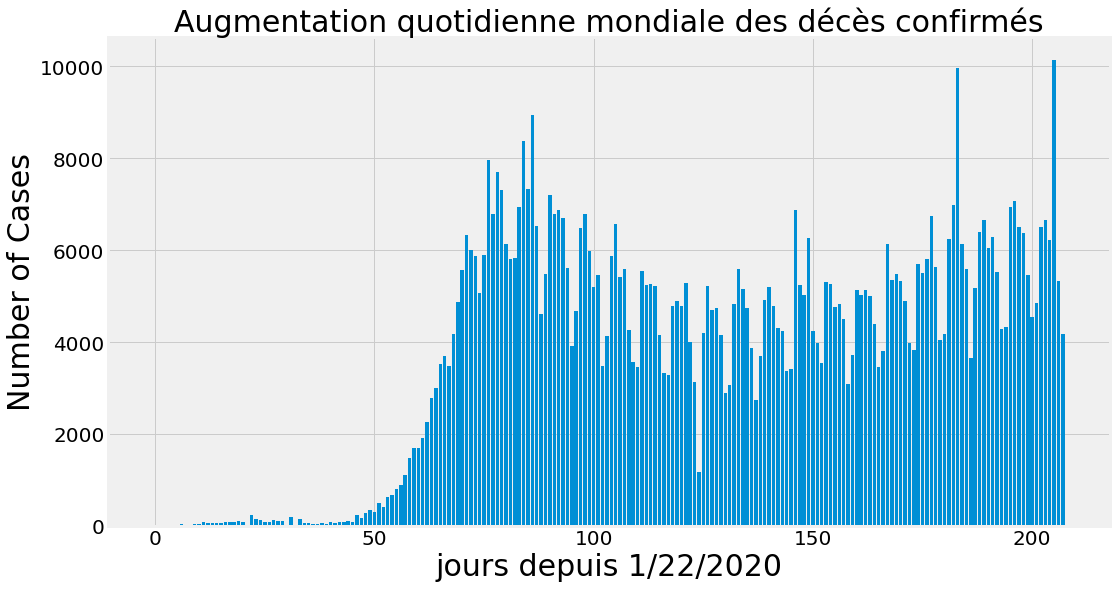

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('Augmentation quotidienne mondiale des décès confirmés', size=30)
plt.xlabel('jours depuis 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

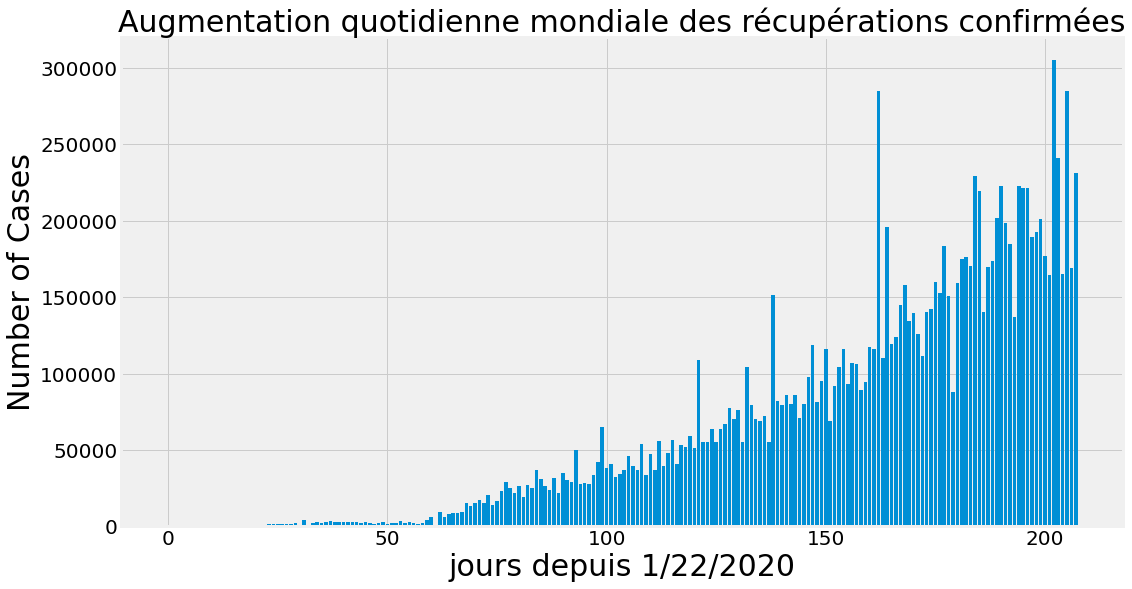

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('Augmentation quotidienne mondiale des récupérations confirmées', size=30)
plt.xlabel('jours depuis 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
#Omar EL Qarchaoui
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Nombre de cas de coronavirus au fil du temps', size=30)
    plt.xlabel('jours depuis 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

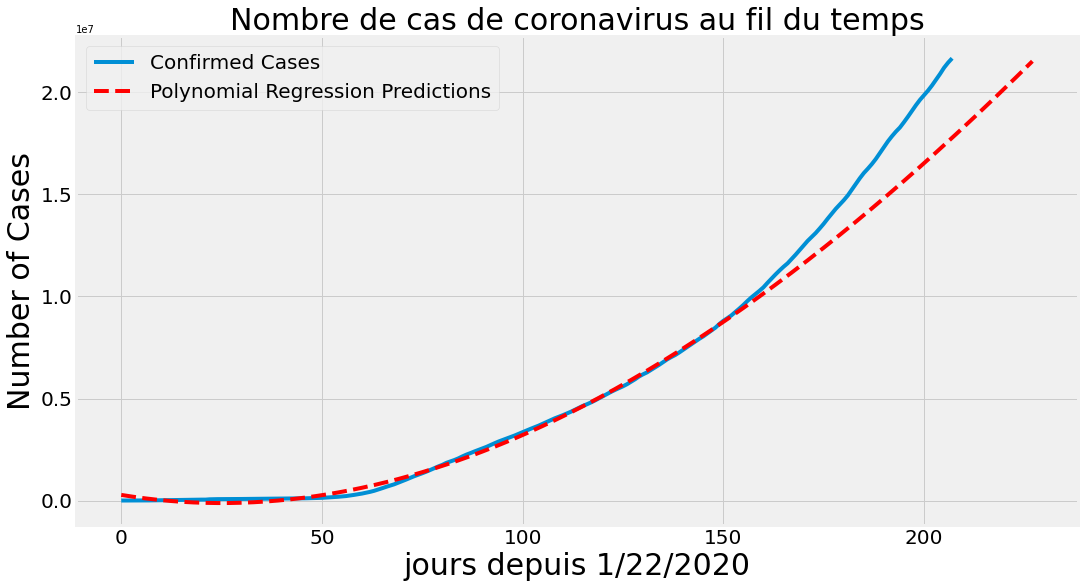

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

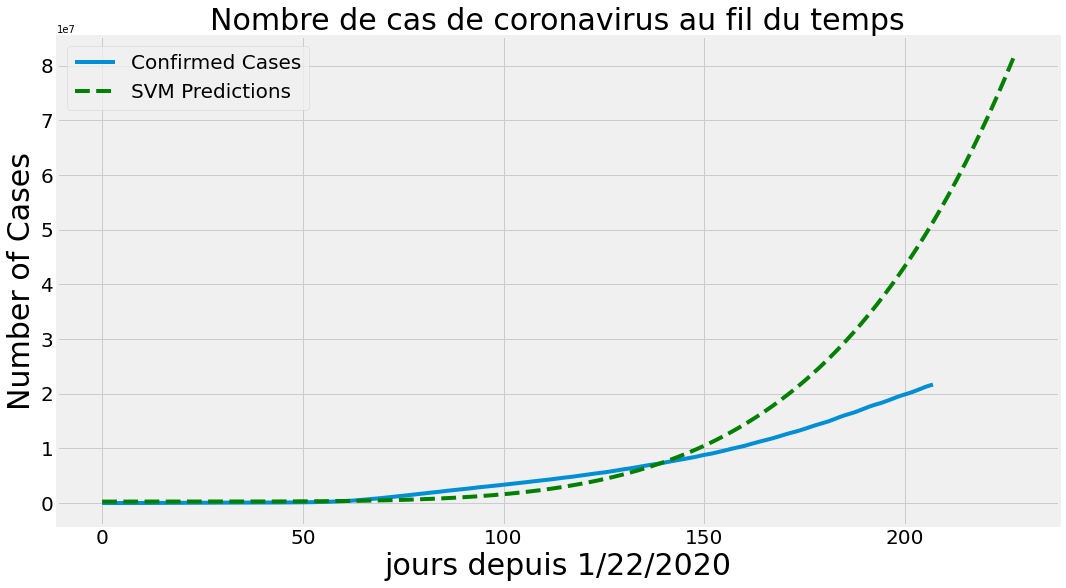

In [ ]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')

In [ ]:
#Omar ElQrachaoui
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'polynomial regression : Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

,Date,polynomial regression : Predicted number of Confirmed Cases Worldwide
0,08/17/2020,17957321.0
1,08/18/2020,18138920.0
2,08/19/2020,18321239.0
3,08/20/2020,18504274.0
4,08/21/2020,18688023.0
5,08/22/2020,18872483.0
6,08/23/2020,19057651.0
7,08/24/2020,19243524.0
8,08/25/2020,19430099.0
9,08/26/2020,19617374.0


In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted : of Confirmed Cases Worldwide': np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted : of Confirmed Cases Worldwide
0,08/17/2020,52627652.0
1,08/18/2020,53898386.0
2,08/19/2020,55193674.0
3,08/20/2020,56513871.0
4,08/21/2020,57859333.0
5,08/22/2020,59230423.0
6,08/23/2020,60627504.0
7,08/24/2020,62050945.0
8,08/25/2020,63501115.0
9,08/26/2020,64978391.0


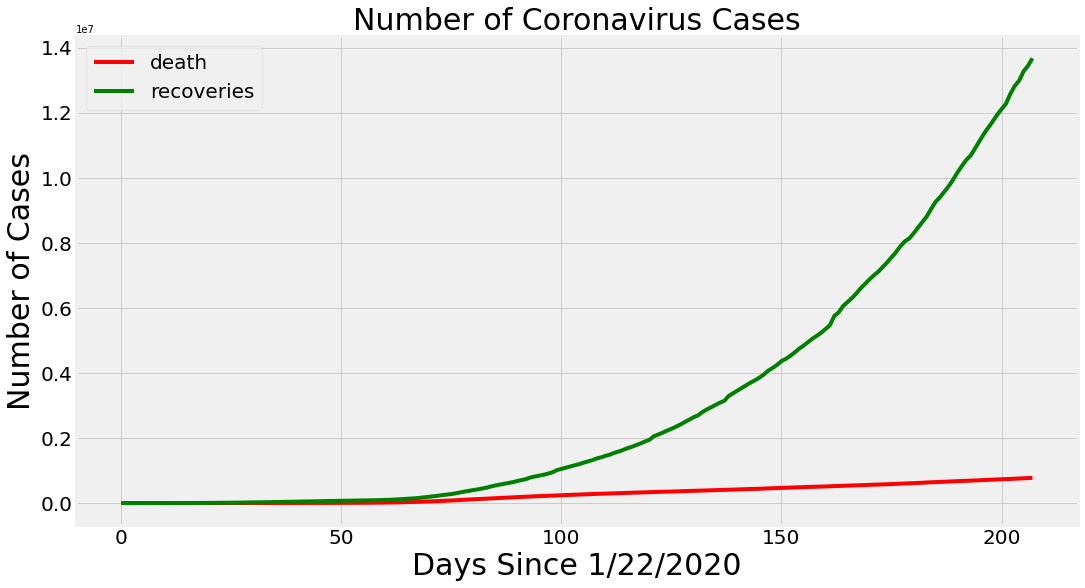

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

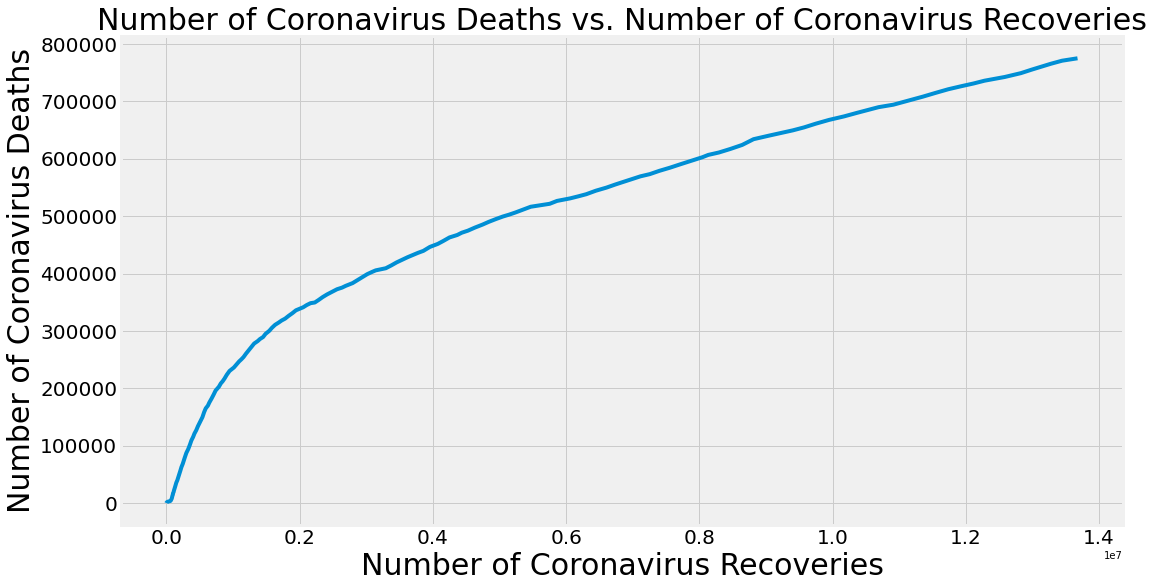

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
#Omar Elqarchaoui
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('jours depuis 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('jours depuis 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('jours depuis 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('jours depuis 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

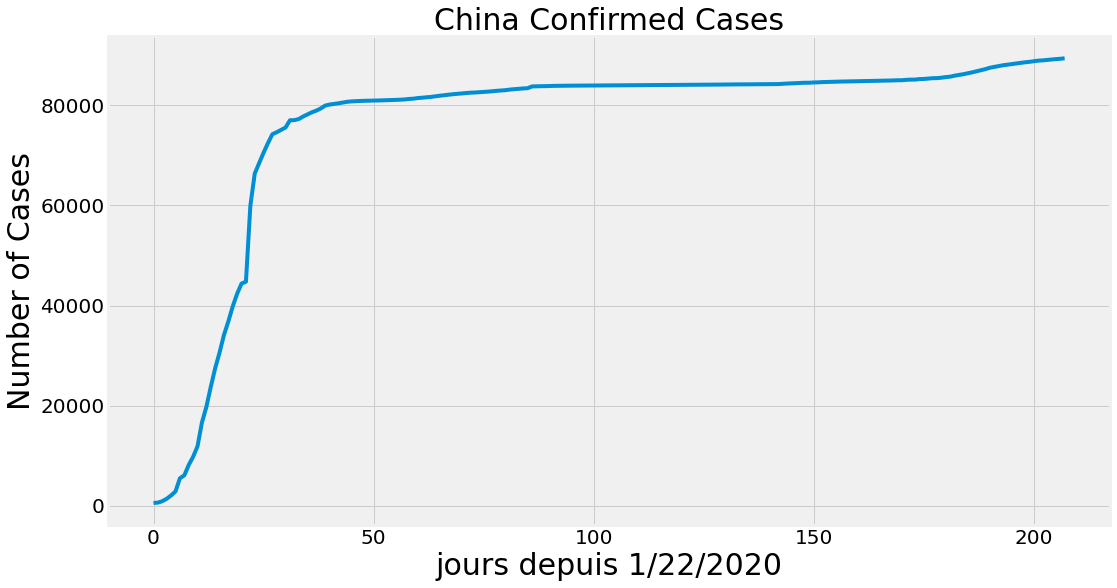

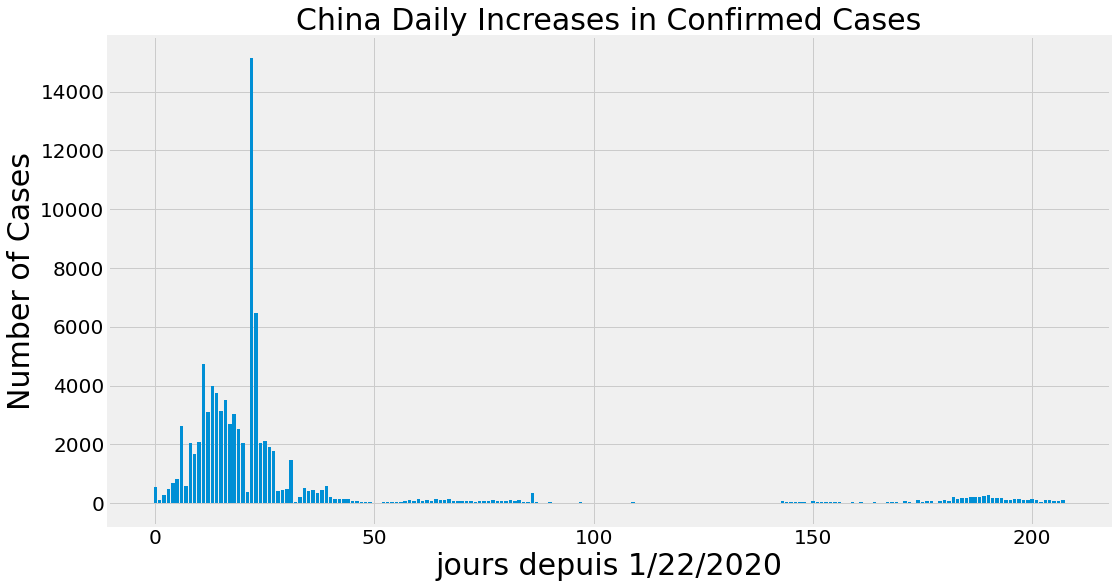

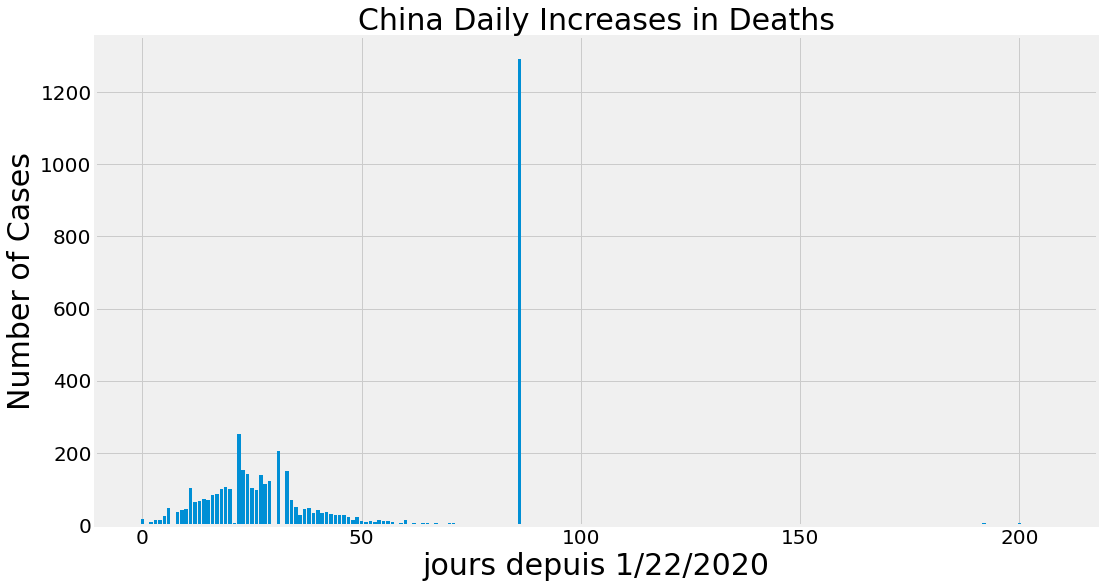

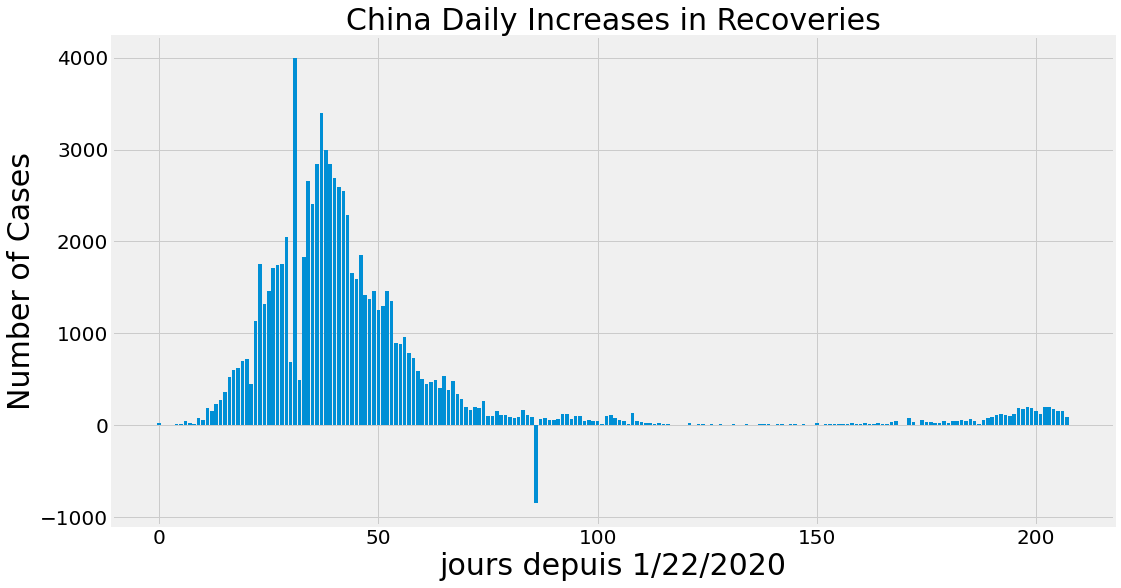

In [ ]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')
# china daily inscrease ( negative values ) chamsse l3achiya 

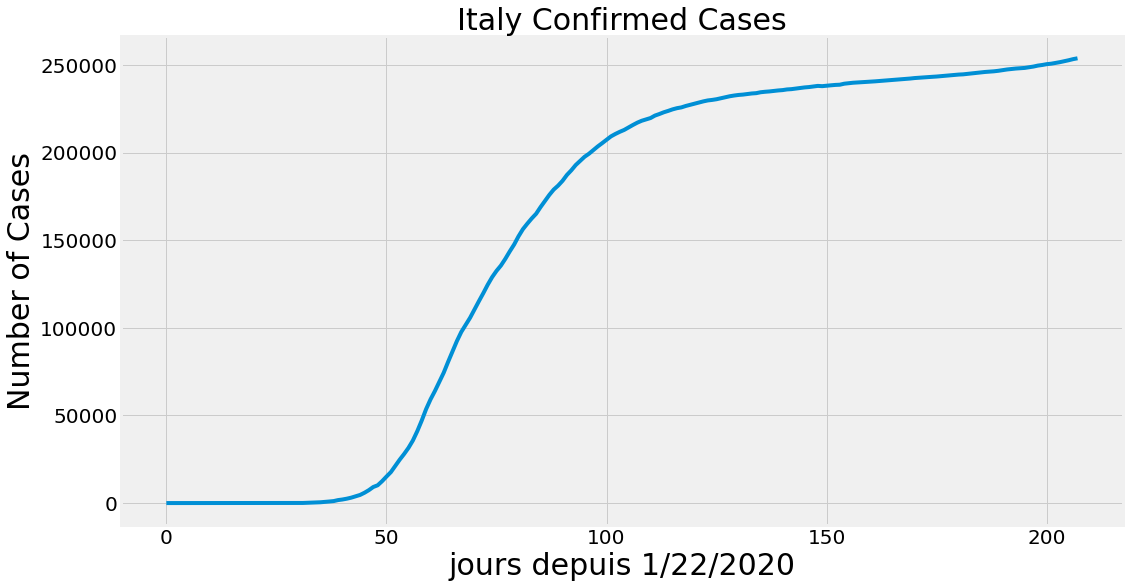

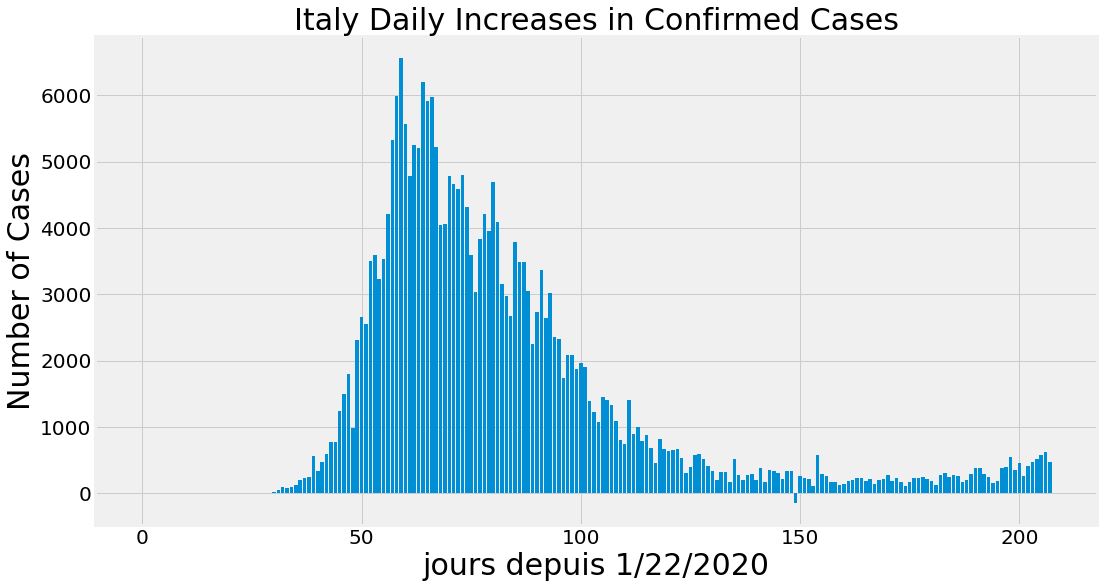

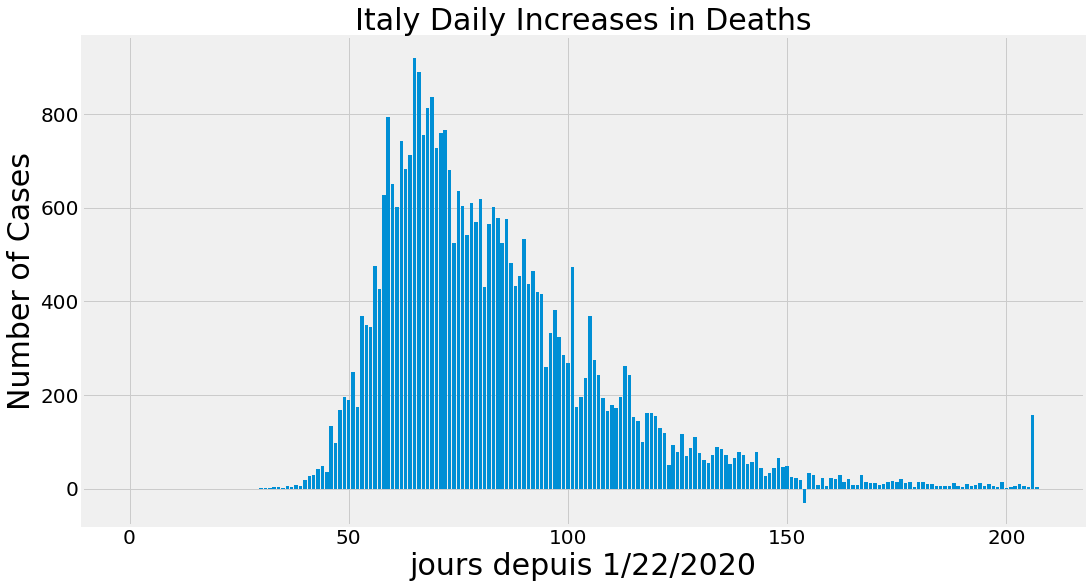

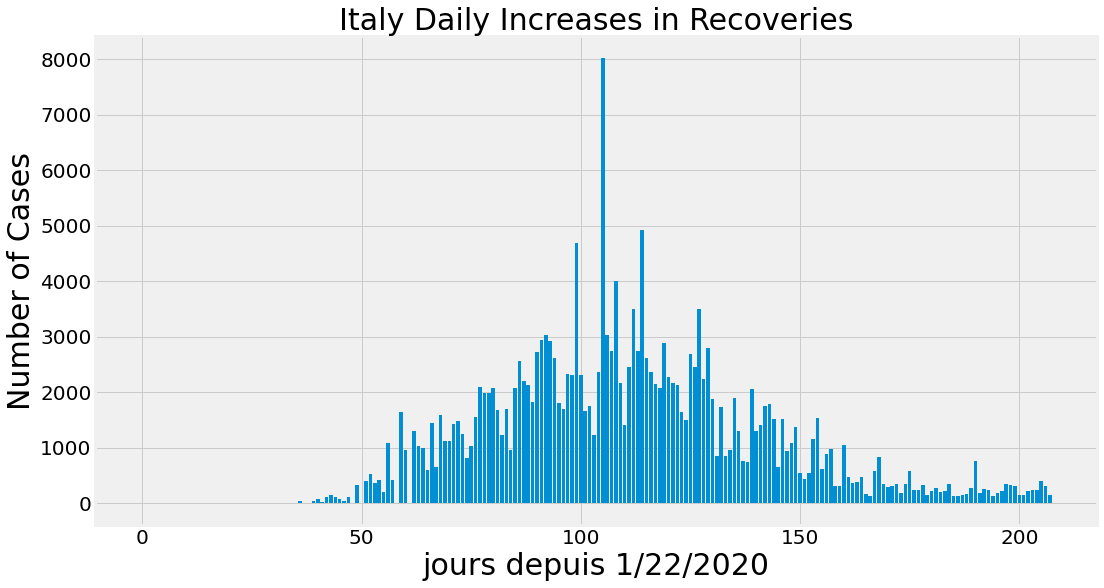

In [ ]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

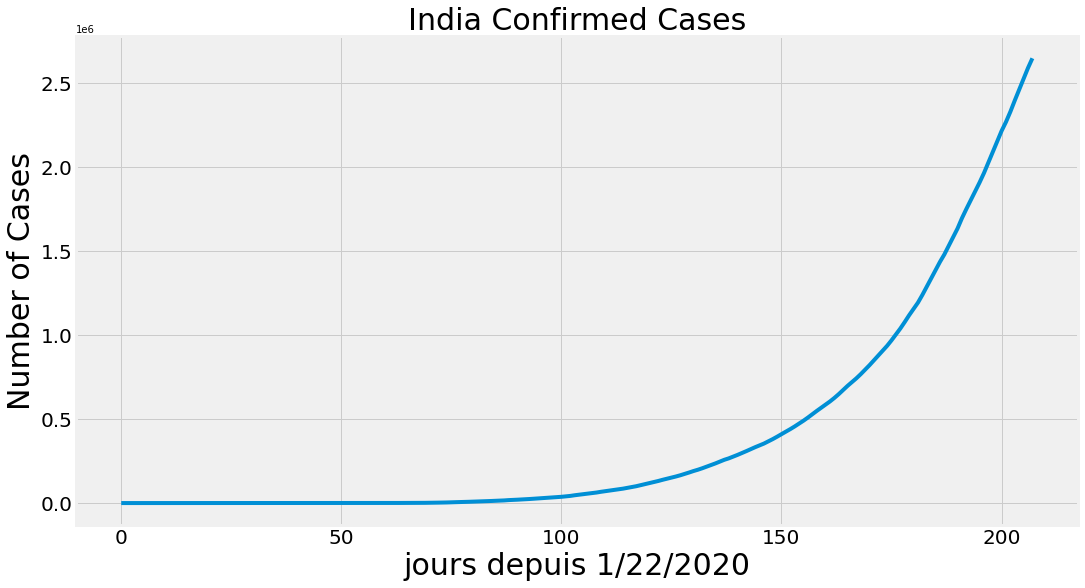

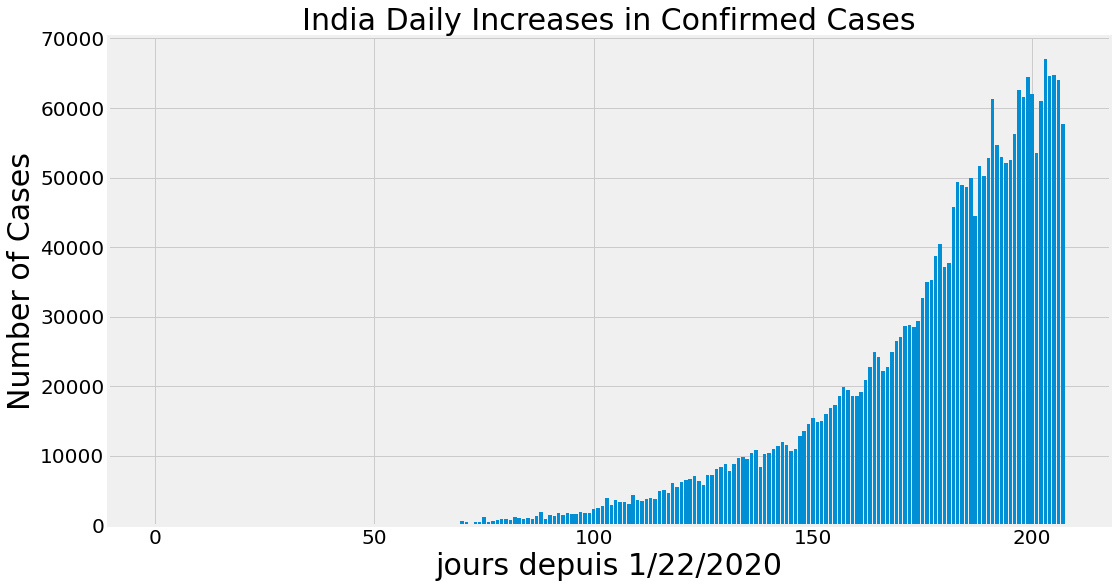

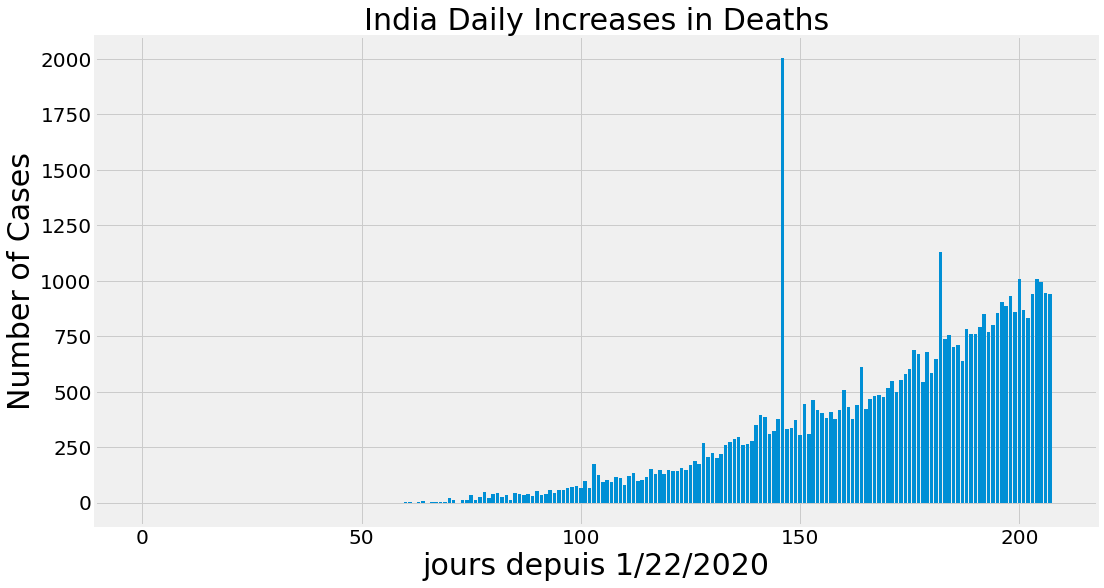

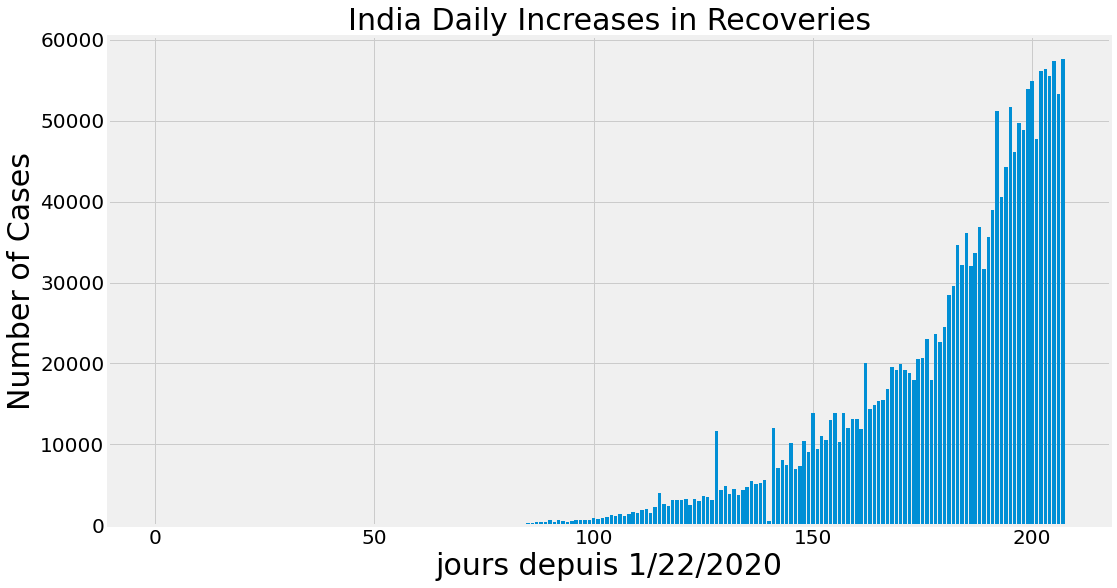

In [ ]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

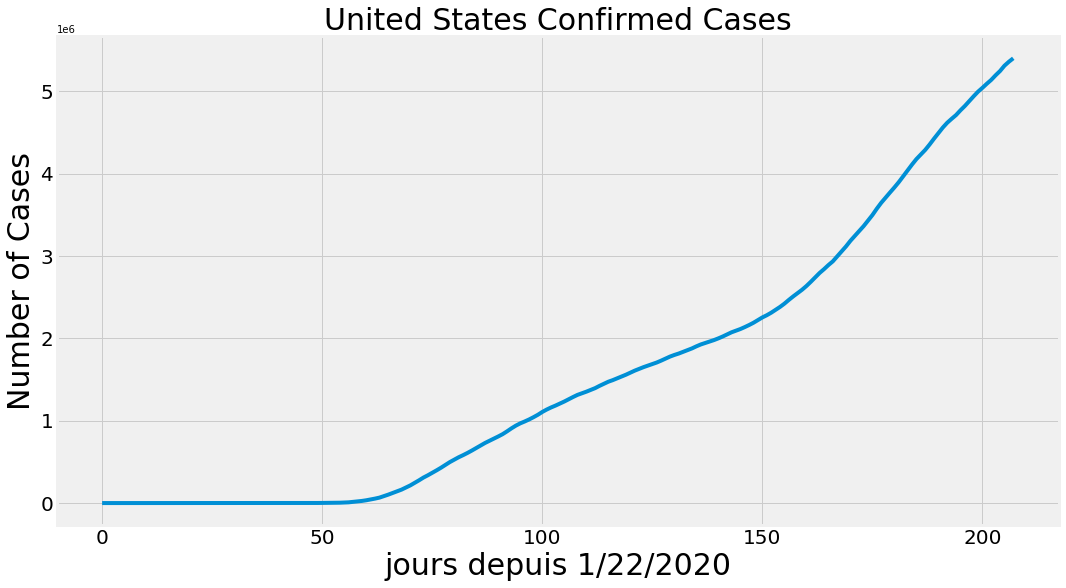

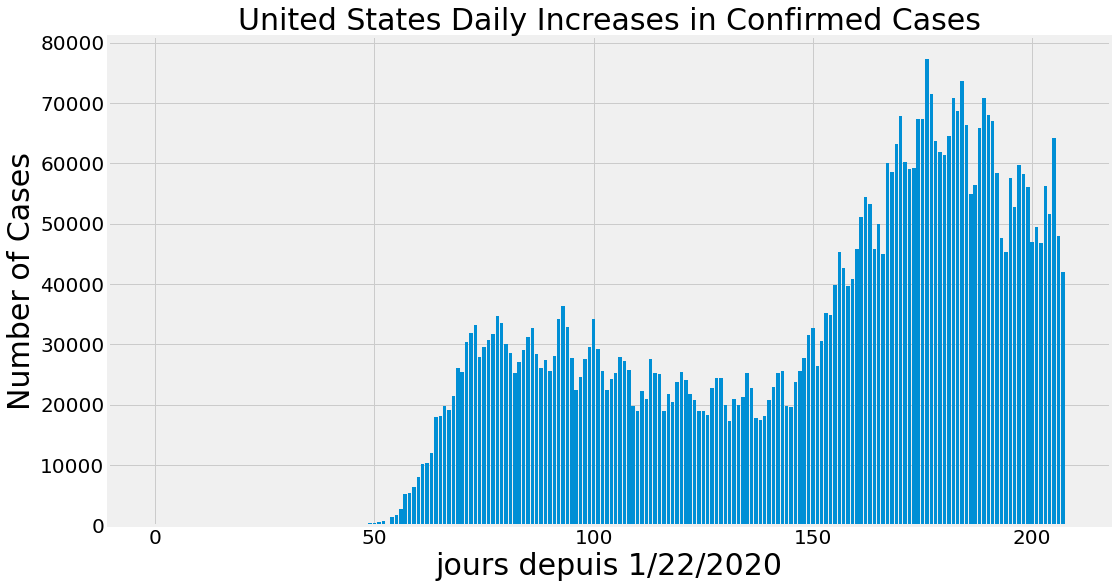

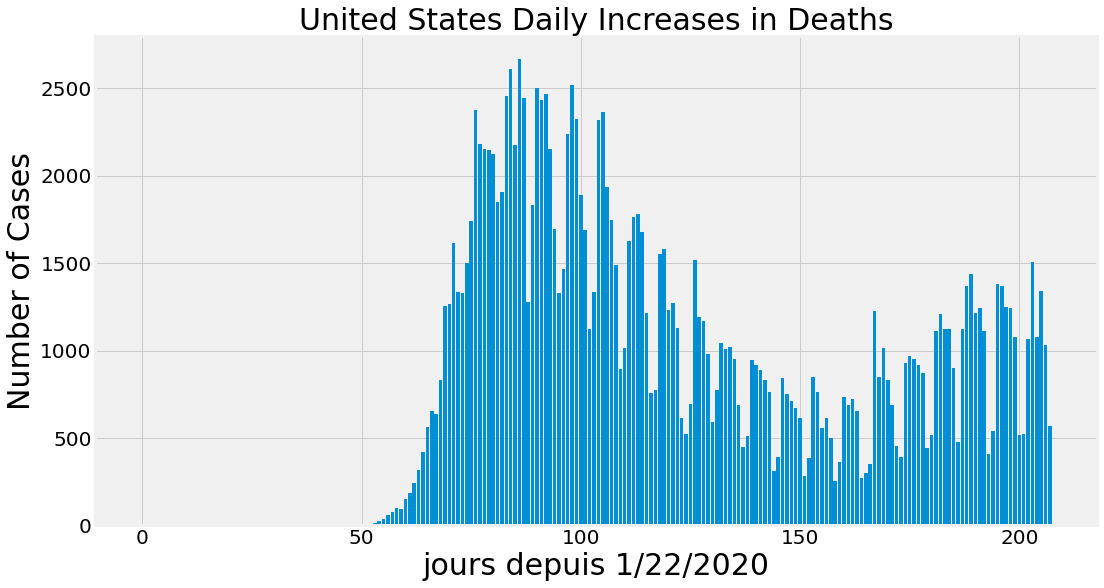

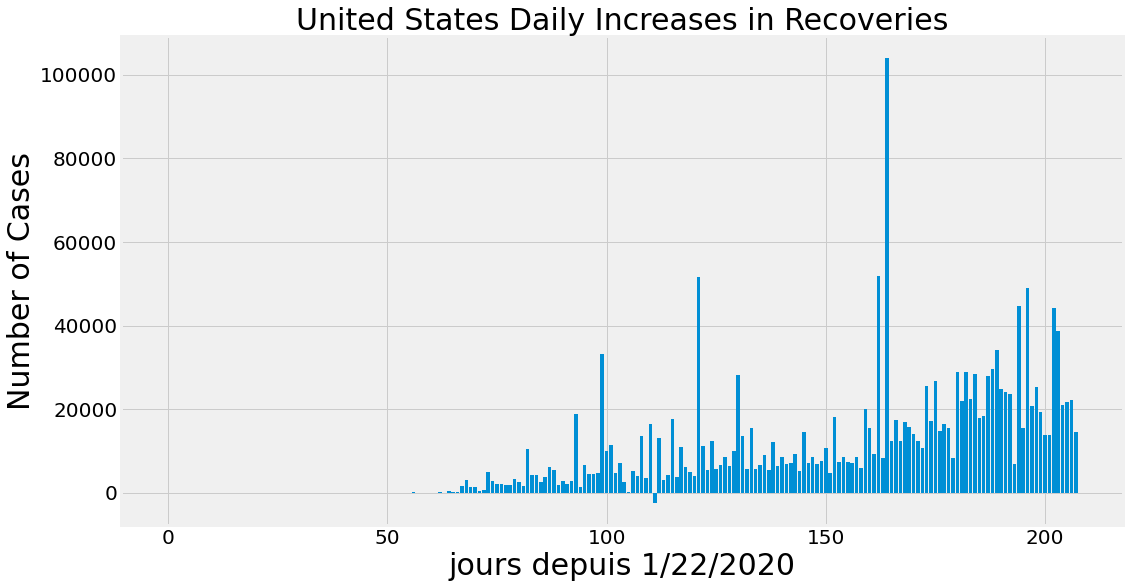

In [ ]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

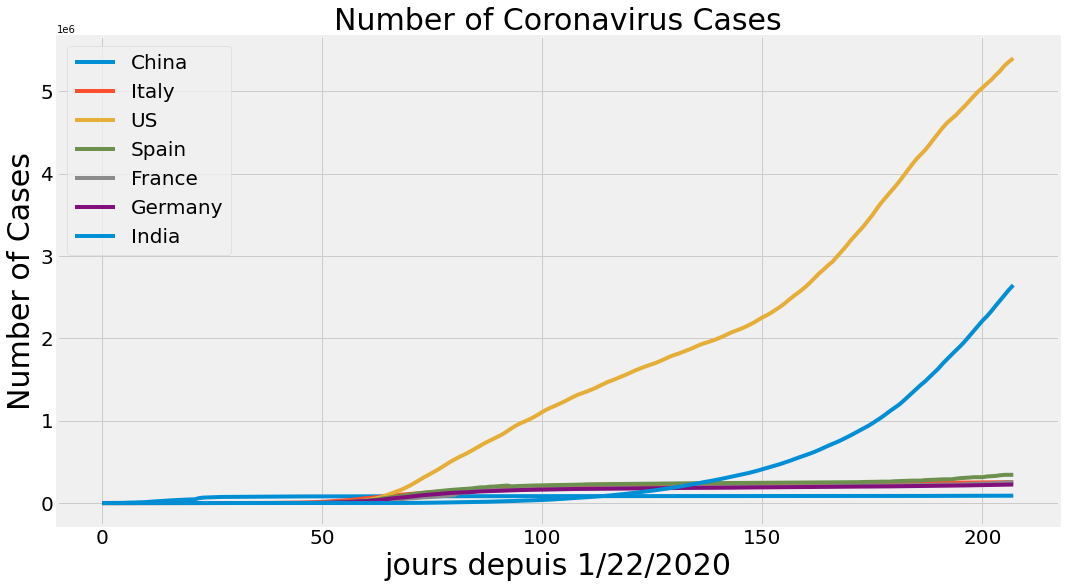

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('jours depuis 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

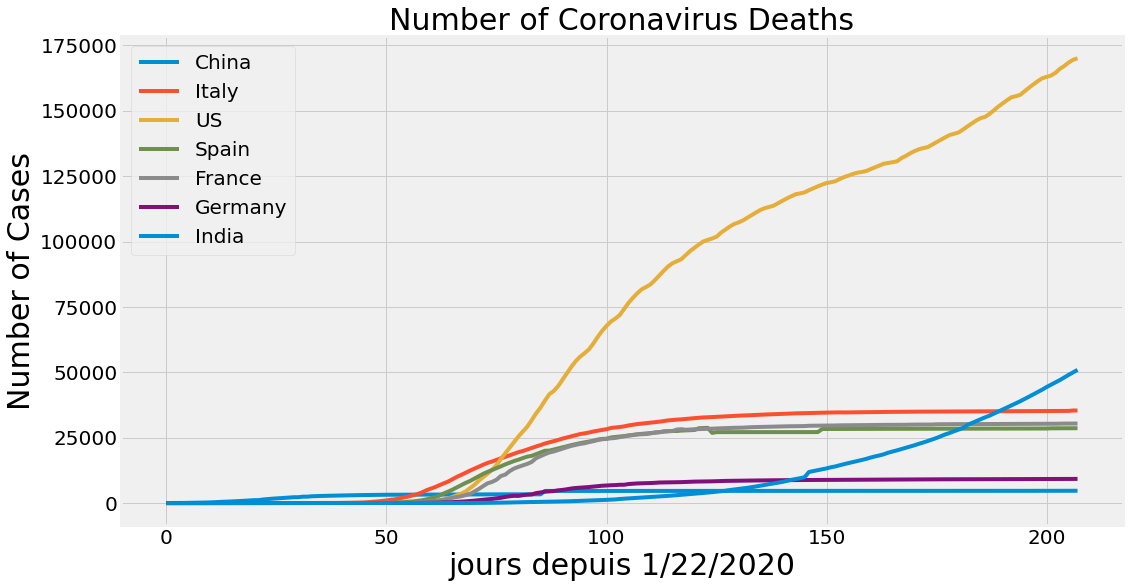

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('jours depuis 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

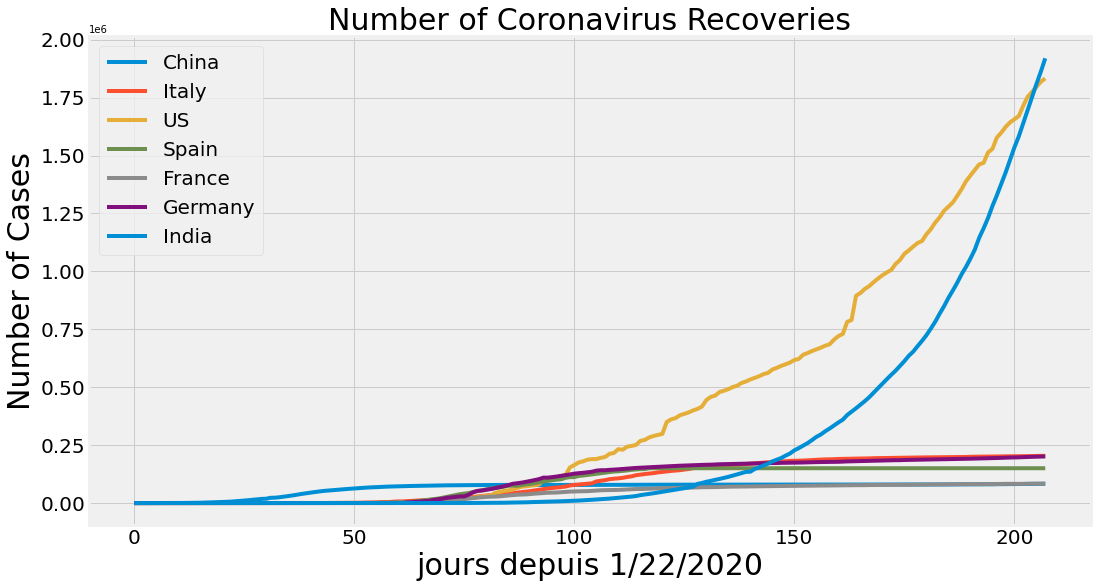

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('jours depuis 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
# 